## Introduction

This project aims to look at oil well data from the OilyGiant company from three different regions and use this to decide the best place to build a new well. This will be done by:

1) Collecting the oil well parameters in the selected region
2) Building a model for predicting the volume of reserves in the new wells
3) Picking the oil wells with the highest estimated values
4) Picking the region with the highest total profit for the selected oil wells.

## Data Cleaning/ Preparation

In [1]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

In [2]:
#import data sets for each region
geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

In order to prepare this data for analysis, certain changes must be made to each data set. Firstly, the data set will be checked for duplicate rows. Then, the ID column will be dropped, as the id of the well does not play a role in determining the volume of reserves in the well. The data will be searched for missing and lastly divided into feature and target sets. A boxplot will also be made for each data set to look for potential target outliers that could impact model behavior. 

## a) Geo 0

In [3]:
#geo_0
display(geo_0.info())
display(geo_0.head(10))

#check for duplicates 
geo_0_duplicated = geo_0.duplicated().sum()
print(f'The number of duplicated rows in this data frame is {geo_0_duplicated}')
print()

#drop id column
geo_0_id = geo_0['id']
geo_0 = geo_0.drop(columns=['id'])

# check for missing values
display(geo_0.info())
print('There are no missing values in this data frame.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


The number of duplicated rows in this data frame is 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

There are no missing values in this data frame.


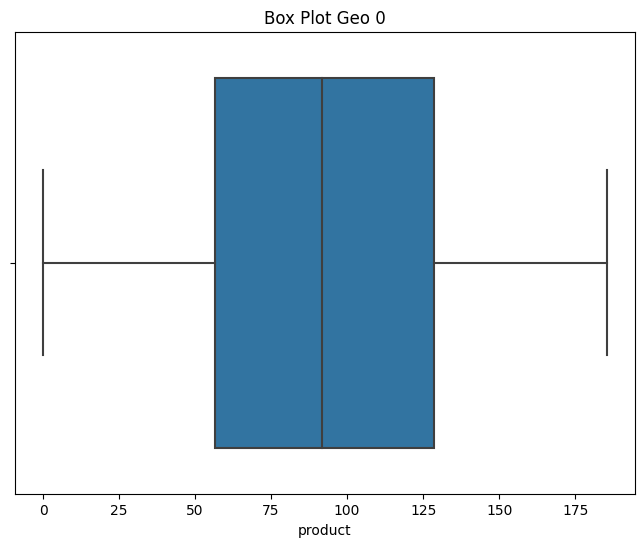

No outliers are seen in this boxplot


In [4]:
#look for outliers that could impact model behavior
plt.figure(figsize=(8, 6))
sns.boxplot(x=geo_0['product'], flierprops=dict(marker='o', color='r', markersize=8))
plt.title(f'Box Plot Geo 0')
plt.xlabel('product')

plt.show()
print(f'No outliers are seen in this boxplot')

In [5]:
#split into features and target set for geo 0 
g0_features = geo_0.drop(columns=['product'])
g0_target = geo_0['product']
display(g0_features.head(5))
display(g0_target.head(5))

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


0    105.280062
1     73.037750
2     85.265647
3    168.620776
4    154.036647
Name: product, dtype: float64

## b) Geo 1

In [6]:
#geo_1
display(geo_1.info())
display(geo_1.head(10))

#check for duplicates 
geo_1_duplicated = geo_1.duplicated().sum()
print(f'The number of duplicated rows in this data frame is {geo_1_duplicated}')
print()

#drop id column
geo_1_id = geo_1['id']
geo_1 = geo_1.drop(columns=['id'])

# check for missing values
display(geo_1.info())
print('There are no missing values in this data frame.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


The number of duplicated rows in this data frame is 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

There are no missing values in this data frame.


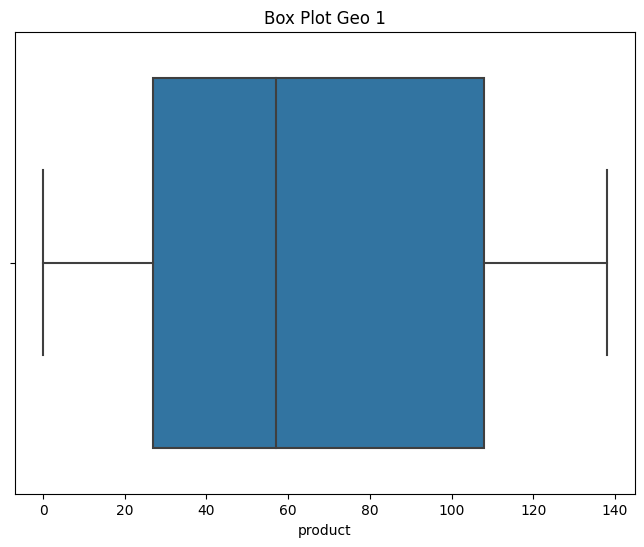

No outliers are seen in this boxplot


In [7]:
#look for outliers that could impact model behavior
plt.figure(figsize=(8, 6))
sns.boxplot(x=geo_1['product'], flierprops=dict(marker='o', color='r', markersize=8))
plt.title(f'Box Plot Geo 1')
plt.xlabel('product')

plt.show()
print(f'No outliers are seen in this boxplot')

In [8]:
#split into features and target set for geo 1
g1_features = geo_1.drop(columns=['product'])
g1_target = geo_1['product']
display(g1_features.head(5))
display(g1_target.head(5))

,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363


0      3.179103
1     26.953261
2    134.766305
3    137.945408
4    134.766305
Name: product, dtype: float64

## c) Geo 2

In [9]:
#geo_2
display(geo_2.info())
display(geo_2.head(10))

#check for duplicates 
geo_2_duplicated = geo_2.duplicated().sum()
print(f'The number of duplicated rows in this data frame is {geo_2_duplicated}')
print()

#drop id column
geo_2_id = geo_2['id']
geo_2 = geo_2.drop(columns=['id'])

# check for missing values
display(geo_2.info())
print('There are no missing values in this data frame.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


The number of duplicated rows in this data frame is 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


None

There are no missing values in this data frame.


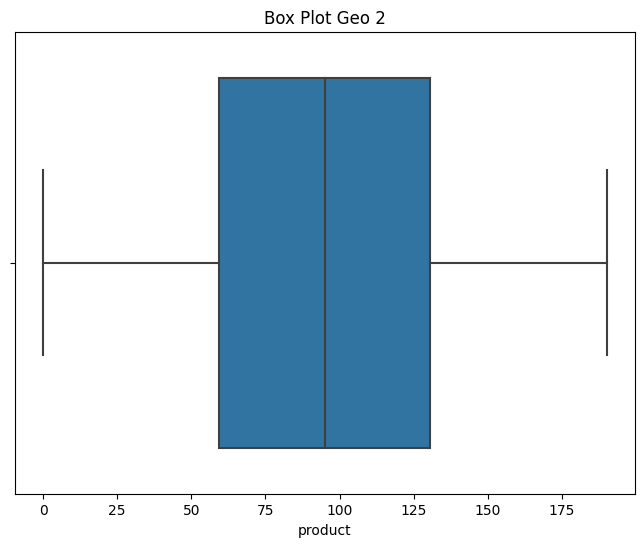

No outliers are seen in this boxplot


In [10]:
#look for outliers that could impact model behavior
plt.figure(figsize=(8, 6))
sns.boxplot(x=geo_2['product'], flierprops=dict(marker='o', color='r', markersize=8))
plt.title(f'Box Plot Geo 2')
plt.xlabel('product')

plt.show()
print(f'No outliers are seen in this boxplot')

In [11]:
#split into features and target set
g2_features = geo_2.drop(columns=['product'])
g2_target = geo_2['product']
display(g2_features.head(5))
display(g2_target.head(5))

,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011


0     27.758673
1     56.069697
2     62.871910
3    114.572842
4    149.600746
Name: product, dtype: float64

## Train and Test a Model for Each Region

Data is prepared for the model training and testing by applying feature scaling. Because the features are on different scales, this method ensures that all features are considered equally important regardless of value.

## a) Geo_0 data set

In [12]:
#Split the data into a training set and validation set at a ratio of 75:25
g0_x_train, g0_x_val, g0_y_train, g0_y_val = train_test_split(g0_features, g0_target, test_size=0.25, random_state=123)
print(g0_x_train.shape)
print(g0_x_val.shape)

#use feature scaling to ensure that all features are equally important
scaler = StandardScaler()
g0_x_train_scaled = scaler.fit_transform(g0_x_train)
g0_x_val_scaled = scaler.transform(g0_x_val)

(75000, 3)
(25000, 3)


In [13]:
#train the model and make predictions for the validation set
#save the predictions and correct answers for the validation set
model= LinearRegression()
model_0 = model.fit(g0_x_train_scaled,g0_y_train)
g0_pred_val = model_0.predict(g0_x_val_scaled)
#g0_pred_val are the predictions and g0_y_val are the correct answers

In [14]:
#Print the average volume of predicted reserves and model RMSE
g0_avg_product = g0_pred_val.mean()
print(f'The average volume of predicted reserves is {g0_avg_product} (in thousands of barrels)')
print(f'The average true volume of reserves is {g0_y_val.mean()} (in thousands of barrels)')

#calculate RMSE
g0_mse = mean_squared_error(g0_y_val, g0_pred_val)
g0_rmse = np.sqrt(g0_mse)
print(f"Root Mean Squared Error (RMSE) for geo_0: {g0_rmse}")

#calculate cross-value score
cv_scores_0 = cross_val_score(model_0, g0_x_train_scaled, g0_y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores_0)

print(f"Cross-validation RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE score using cross-val: {rmse_scores.mean()}")

The average volume of predicted reserves is 92.54936189116306 (in thousands of barrels)
The average true volume of reserves is 92.85062391123445 (in thousands of barrels)
Root Mean Squared Error (RMSE) for geo_0: 37.64786282376177
Cross-validation RMSE scores for each fold: [37.83096164 37.5014502  37.99865563 37.59842431 37.61166073]
Average RMSE score using cross-val: 37.70823050364874


## b) Geo_1 data set

In [15]:
#Split the data into a training set and validation set at a ratio of 75:25
g1_x_train, g1_x_val, g1_y_train, g1_y_val = train_test_split(g1_features, g1_target, test_size=0.25, random_state=123)
print(g1_x_train.shape)
print(g1_x_val.shape)

#use feature scaling to ensure that all features are equally important
scaler = StandardScaler()
g1_x_train_scaled = scaler.fit_transform(g1_x_train)
g1_x_val_scaled = scaler.transform(g1_x_val)

(75000, 3)
(25000, 3)


In [16]:
#train the model and make predictions for the validation set
#save the predictions and correct answers for the validation set
model= LinearRegression()
model_1 = model.fit(g1_x_train_scaled, g1_y_train)
g1_pred_val = model_1.predict(g1_x_val_scaled)
#g1_pred_val are the predictions and g1_y_val are the correct answers

In [17]:
#Print the average volume of predicted reserves and model RMSE
g1_avg_product = g1_pred_val.mean()
print(f'The average volume of predicted reserves is {g1_avg_product} (in thousands of barrels)')
print(f'The average true volume of reserves is {g1_y_val.mean()} (in thousands of barrels)')

#calculate RMSE
g1_mse = mean_squared_error(g1_y_val, g1_pred_val)
g1_rmse = np.sqrt(g1_mse)
print(f"Root Mean Squared Error (RMSE) for geo_0: {g1_rmse}")

#calculate cross-value score
cv_scores_1 = cross_val_score(model_1, g1_x_train_scaled, g1_y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores_1)

print(f"Cross-validation RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE score using cross-val: {rmse_scores.mean()}")

The average volume of predicted reserves is 69.28001860653976 (in thousands of barrels)
The average true volume of reserves is 69.27371236077902 (in thousands of barrels)
Root Mean Squared Error (RMSE) for geo_0: 0.8954139804944314
Cross-validation RMSE scores for each fold: [0.88828951 0.89022109 0.88910691 0.88659141 0.88948678]
Average RMSE score using cross-val: 0.8887391383209982


## c) Geo_2 data set

In [18]:
#Split the data into a training set and validation set at a ratio of 75:25
g2_x_train, g2_x_val, g2_y_train, g2_y_val = train_test_split(g2_features, g2_target, test_size=0.25, random_state=123)
print(g2_x_train.shape)
print(g2_x_val.shape)

#use feature scaling to ensure that all features are equally important
scaler = StandardScaler()
g2_x_train_scaled = scaler.fit_transform(g2_x_train)
g2_x_val_scaled = scaler.transform(g2_x_val)

(75000, 3)
(25000, 3)


In [19]:
#train the model and make predictions for the validation set
#save the predictions and correct answers for the validation set
model= LinearRegression()
model_2 = model.fit(g2_x_train_scaled, g2_y_train)
g2_pred_val = model_2.predict(g2_x_val_scaled)
#g2_pred_val are the predictions and g2_y_val are the correct answers

In [20]:
#Print the average volume of predicted reserves and model RMSE
g2_avg_product = g2_pred_val.mean()
print(f'The average volume of predicted reserves is {g2_avg_product} (in thousands of barrels)')
print(f'The average true volume of reserves is {g2_y_val.mean()} (in thousands of barrels)')

#calculate RMSE
g2_mse = mean_squared_error(g2_y_val, g2_pred_val)
g2_rmse = np.sqrt(g2_mse)
print(f"Root Mean Squared Error (RMSE) for geo_0: {g2_rmse}")

#calculate cross-value score
cv_scores_2 = cross_val_score(model_2, g2_x_train_scaled, g2_y_train, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores_2)

print(f"Cross-validation RMSE scores for each fold: {rmse_scores}")
print(f"Average RMSE score using cross-val: {rmse_scores.mean()}")

The average volume of predicted reserves is 95.09859933591373 (in thousands of barrels)
The average true volume of reserves is 94.87348818660213 (in thousands of barrels)
Root Mean Squared Error (RMSE) for geo_0: 40.12803006598514
Cross-validation RMSE scores for each fold: [40.26102539 40.052099   39.86496653 39.95105519 40.03797663]
Average RMSE score using cross-val: 40.033424546869085


For Geo_0:
The average volume of predicted reserves is 92.54936189116306 (in thousands of barrels)
The average true volume of reserves is 92.85062391123445 (in thousands of barrels)
Root Mean Squared Error (RMSE) for geo_0: 37.64786282376177

For Geo_1:
The average volume of predicted reserves is 69.28001860653976 (in thousands of barrels)
The average true volume of reserves is 69.27371236077902 (in thousands of barrels)
Root Mean Squared Error (RMSE) for geo_0: 0.8954139804944314

For Geo_2:
The average volume of predicted reserves is 95.09859933591373 (in thousands of barrels)
The average true volume of reserves is 94.87348818660213 (in thousands of barrels)
Root Mean Squared Error (RMSE) for geo_0: 40.12803006598514

RMSE tells us how far predictions fall from the true values. It is interesting to note that while on the average values for all three regions were close in value, the RMSE for region 0 and 2 was relatively high. This indicates some level of innacuracy in the models. Feature scaling was employed and did not help lower the RMSE score. No outliers that were found in any data sets that could alter model performance. Other linear regression models like Ridge and Lasso did not increase model performance. While this gives us insight into product values, perhaps using another model type would be beneficial in finding more accurate results.

## Prepare for Profit Calculation

To calculate profit, the cost and revenue for the oil wells must be determined (profit = revenue - cost). The revenue will be calculated by multiplying the volume of oil by the price (in thousands of barrels). The cost will be the amount of budget allocated to each well.

In [21]:
#Store all key values for calculations in separate variables
revenue_per_unit = 4500
cost = 100000000/200
geo_0['revenue'] = geo_0['product'] * revenue_per_unit
geo_1['revenue'] = geo_0['product'] * revenue_per_unit
geo_2['revenue'] = geo_0['product'] * revenue_per_unit
display(geo_0.head(5))
display(geo_1.head(5))
display(geo_2.head(5))
print(revenue_per_unit)
print(cost)

,f0,f1,f2,product,revenue
0,0.705745,-0.497823,1.221170,105.280062,473760.278296
1,1.334711,-0.340164,4.365080,73.037750,328669.876193
2,1.022732,0.151990,1.419926,85.265647,383695.412089
3,-0.032172,0.139033,2.978566,168.620776,758793.489998
4,1.988431,0.155413,4.751769,154.036647,693164.910318


,f0,f1,f2,product,revenue
0,-15.001348,-8.276000,-0.005876,3.179103,473760.278296
1,14.272088,-3.475083,0.999183,26.953261,328669.876193
2,6.263187,-5.948386,5.001160,134.766305,383695.412089
3,-13.081196,-11.506057,4.999415,137.945408,758793.489998
4,12.702195,-8.147433,5.004363,134.766305,693164.910318


,f0,f1,f2,product,revenue
0,-1.146987,0.963328,-0.828965,27.758673,473760.278296
1,0.262778,0.269839,-2.530187,56.069697,328669.876193
2,0.194587,0.289035,-5.586433,62.871910,383695.412089
3,2.236060,-0.553760,0.930038,114.572842,758793.489998
4,-0.515993,1.716266,5.899011,149.600746,693164.910318


4500
500000.0


In [22]:
#Calculate the volume of reserves sufficient for developing a new well without losses
volume_no_loss = cost/revenue_per_unit
print(f'If each well costs 500,000 USD to make, a well must make at least {volume_no_loss} thousands of barrels of oil to \nmake that money back')

#Compare the obtained value with the average volume of reserves in each region
geo_0_product_avg = geo_0['product'].mean()
print(f'The average volume of oil in thousands of barrels produced in region 0 is {geo_0_product_avg}')
geo_1_product_avg = geo_1['product'].mean()
print(f'The average volume of oil in thousands of barrels produced in region 1 is {geo_1_product_avg}')
geo_2_product_avg = geo_2['product'].mean()
print(f'The average volume of oil in thousands of barrels produced in region 2 is {geo_2_product_avg}')

If each well costs 500,000 USD to make, a well must make at least 111.11111111111111 thousands of barrels of oil to 
make that money back
The average volume of oil in thousands of barrels produced in region 0 is 92.50000000000001
The average volume of oil in thousands of barrels produced in region 1 is 68.82500000000002
The average volume of oil in thousands of barrels produced in region 2 is 95.00000000000004


Looking at these average amounts, it does not seem that any region is overall meeting the standard for profit. However, since 200 wells are in development, these calculation should actually be completed with only the top 200 producing wells in each region. 

In [23]:
#geo_0 top 200 producing wells 
geo_0_sorted = geo_0.sort_values(by='product', ascending=False).head(200)
display(geo_0_sorted.info())

#geo_1 top 200 producing wells 
geo_1_sorted = geo_1.sort_values(by='product', ascending=False).head(200)
display(geo_1_sorted.info())

#geo_2 top 200 producing wells 
geo_2_sorted = geo_2.sort_values(by='product', ascending=False).head(200)
display(geo_2_sorted.info())

#Compare the obtained value with the average volume of reserves in each region
print(f'If each well costs 500,000 USD to make, a well must make at least {volume_no_loss} thousands of barrels of oil to \nmake that money back')
geo_0_product_avg = geo_0_sorted['product'].mean()
print(f'The average volume of oil in thousands of barrels produced in region 0 is {geo_0_product_avg}')
geo_1_product_avg = geo_1_sorted['product'].mean()
print(f'The average volume of oil in thousands of barrels produced in region 1 is {geo_1_product_avg}')
geo_2_product_avg = geo_2_sorted['product'].mean()
print(f'The average volume of oil in thousands of barrels produced in region 2 is {geo_2_product_avg}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 8826 to 79494
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       200 non-null    float64
 1   f1       200 non-null    float64
 2   f2       200 non-null    float64
 3   product  200 non-null    float64
 4   revenue  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 53864 to 16041
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       200 non-null    float64
 1   f1       200 non-null    float64
 2   f2       200 non-null    float64
 3   product  200 non-null    float64
 4   revenue  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 79705 to 51559
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f0       200 non-null    float64
 1   f1       200 non-null    float64
 2   f2       200 non-null    float64
 3   product  200 non-null    float64
 4   revenue  200 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


None

If each well costs 500,000 USD to make, a well must make at least 111.11111111111111 thousands of barrels of oil to 
make that money back
The average volume of oil in thousands of barrels produced in region 0 is 184.83373964536008
The average volume of oil in thousands of barrels produced in region 1 is 137.9454077409057
The average volume of oil in thousands of barrels produced in region 2 is 189.55147698176646


Given this updated information, the top producing wells in all three regions are producing the amount of oil necessary to turn a profit. Region 0 and region 2 are both higher producing than region 1 with region 2 producing slightly more oil overall. 

## Profit Calculation

In [24]:
def profit(targets, predictions, wells_to_select=200, revenue_per_unit=4500, cost=500000):
    targets = pd.Series(targets).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    #select top 200 wells
    top_indices = predictions.sort_values(ascending=False).head(wells_to_select).index
    selected_volumes = targets.iloc[top_indices]
    #calculate profit
    total_revenue = selected_volumes.sum() * revenue_per_unit
    total_cost = wells_to_select * cost
    total_profit = total_revenue - total_cost

    return total_profit

In [37]:
#use profit calculation for three regions
#geo_0 profit
result_0 = profit(g0_y_val, g0_pred_val)
print(f"Estimated Total Profit for Region 0: ${result_0:,.2f}")

#geo_1 profit
result_1 = profit(g1_y_val, g1_pred_val)
print(f"Estimated Total Profit For Region 1: ${result_1:,.2f}")

#geo_2 profit
result_2 = profit(g2_y_val, g2_pred_val)
print(f"Estimated Total Profit For Region 2: ${result_2:,.2f}")

Estimated Total Profit for Region 0: $35,346,709.17
Estimated Total Profit For Region 1: $24,150,866.97
Estimated Total Profit For Region 2: $23,703,438.63


Of the 200 wells in each region that are predicted to produce the highest volume of oil, the region that has the highest profit from these well is region 0. It is predicted that this well will outperform both other regions by nearly 10 million dollars. However high RMSE value for the model for region 0 does cast some doubt as to how reliable these predictions might be.

## Calculate Risks and Profit for Each Region

In [38]:
#create bootstrapping function
def bootstrap_profits(targets, predictions, n_iterations=1000, sample_size=500):
    
    targets = np.array(targets)
    predictions = np.array(predictions)
    profits = []

    for i in range(n_iterations):
        sample_indices = np.random.choice(len(targets), size=sample_size, replace=True)

        #boostrap
        sample_targets = targets[sample_indices]
        sample_predictions = predictions[sample_indices]

        #profit
        p = profit(sample_targets, sample_predictions)
        profits.append(p)

    return profits

## a) Geo 0 -Distribution of Profit

In [30]:
g0_bootstrap_profits = bootstrap_profits(g0_y_val, g0_pred_val)
print(f"Mean profit: {np.mean(g0_bootstrap_profits):,.2f}")
print(f"95% Confidence Interval: [{np.percentile(g0_bootstrap_profits, 2.5):,.2f}, {np.percentile(g0_bootstrap_profits, 97.5):,.2f}]")

Mean profit: 4,788,216.97
95% Confidence Interval: [-345,322.45, 9,891,383.35]


## b) Geo 1 - Distribution of Profit

In [31]:
g1_bootstrap_profits = bootstrap_profits(g1_y_val, g1_pred_val)
print(f"Mean profit: {np.mean(g1_bootstrap_profits):,.2f}")
print(f"95% Confidence Interval: [{np.percentile(g1_bootstrap_profits, 2.5):,.2f}, {np.percentile(g1_bootstrap_profits, 97.5):,.2f}]")

Mean profit: 4,625,780.79
95% Confidence Interval: [824,296.79, 8,658,676.77]


## c) Geo 2 - Distribution of Profit

In [32]:
g2_bootstrap_profits = bootstrap_profits(g2_y_val, g2_pred_val)
print(f"Mean profit: {np.mean(g2_bootstrap_profits):,.2f}")
print(f"95% Confidence Interval: [{np.percentile(g2_bootstrap_profits, 2.5):,.2f}, {np.percentile(g2_bootstrap_profits, 97.5):,.2f}]")

Mean profit: 3,409,944.01
95% Confidence Interval: [-1,468,770.59, 8,790,267.15]


Looking at the bootstrapping data, region 0 has the highest mean profit. However it also has a negative number at the lower end of its confidence interval, meaning that there is a chance that the average profit could be negative, making these wells actually a net loss. Looking at the bootstrap profit distributions as they stand, I would suggest region 1, as it is the only region with a confidence interval that is fully positive and therefore liekly to make money consistently. This model also has the lowest RMSE value of the three regions, meaning this prediction is the most likely to be accurate of the three regions.

## a) Geo 0 - Risk of Losses

In [34]:
#convert to numpy
profits = np.array(g0_bootstrap_profits)
#count/calculate portion of losses
losses = profits < 0
risk_of_loss = losses.mean() * 100  # Convert to percentage

print(f"Risk of Losses: {risk_of_loss:.2f}%")

Risk of Losses: 3.60%


## b) Geo 1 - Risk of Losses

In [35]:
#convert to numpy
profits = np.array(g1_bootstrap_profits)
#count/calculate portion of losses
losses = profits < 0
risk_of_loss = losses.mean() * 100  # Convert to percentage

print(f"Risk of Losses: {risk_of_loss:.2f}%")

Risk of Losses: 0.80%


## c) Geo 2 - Risk of Losses

In [36]:
#convert to numpy
profits = np.array(g2_bootstrap_profits)
#count/calculate portion of losses
losses = profits < 0
risk_of_loss = losses.mean() * 100  # Convert to percentage

print(f"Risk of Losses: {risk_of_loss:.2f}%")

Risk of Losses: 9.40%


Of the three regions, region 1 is the region with the lowest risk of loss and the only one to meet project standards in this category.

## Conclusion

Looking at the data for OilyGiant, it seems that the best region for developmemnt is region 1. The model for region 1 had the lowest RMSE scores and therefore is considered the most accurate of the three. While the initial prpfit calculated was highest for region 0, the unpredictable model makes it hard to rely on its findings, and region 1 is the best performing after that. The bootstrap distribution of profit only yielded consistent profit for this region. Lastly the risk of loss was the lowest. Given all of this information, region 1 seems the best option for development and money investment.

The largest issue with this analysis is the uncertainty with predicted values as the RMSE was large for regions 0 and 2. This makes values such as profit that were calculated based on predicted values less reliable. Further modeling would be needed to run profit calculations on those values with more confidence. 